# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [34]:
"""
OPTION CHOSEN:
Easiest option: Implement the bar coloring as described above - 
a color scale with only three colors, (e.g. blue, white, and red). 
Assume the user provides the y axis value of interest as a parameter or variable.
"""

'\nOPTION CHOSEN:\nEasiest option: Implement the bar coloring as described above - \na color scale with only three colors, (e.g. blue, white, and red). \nAssume the user provides the y axis value of interest as a parameter or variable.\n'

In [35]:
from scipy import stats
import matplotlib.pyplot as plt
import math

class ColorPlot(object):
    def __init__(self, data, y_parameter = 35000, confidence_interval = 0.95):
        self.data = data
        self.confidence_interval = confidence_interval
        self.y_parameter = y_parameter
        self._no_df_rows = None
        self._no_df_cols = None
        self._mean_per_year = None
        self._std_per_year = None
        self._yerr = None
        self.graph_bars = None
        return

    @property
    def no_df_rows(self):
        """calculate the numberr of rows in the data frame"""
        if self._no_df_rows is None:
            self._no_df_rows = self.data.shape[0]
        return self._no_df_rows
    
    @property
    def no_df_cols(self):
        """calculate the number of columns in the data frame"""
        if self._no_df_cols is None:
            self._no_df_cols = self.data.shape[1]
        return self._no_df_cols
    
    @property
    def mean_per_year(self):
        """calculate the mean of each year in the data frame"""
        if self._mean_per_year is None:
            self._mean_per_year = self.data.mean(axis = 1)
        return self._mean_per_year
    
    @property
    def std_per_year(self):
        """calculate the std deviation of each year in the data frame"""
        if self._std_per_year is None:
            self._std_per_year = self.data.std(axis = 1)
        return self._std_per_year
    
    @property
    def yerr(self):
        """calculate the error margin of each year in the data frame"""
        if self._yerr is None:
            R = stats.norm.interval(self.confidence_interval, loc = self.mean_per_year, scale = self.std_per_year/math.sqrt(self.no_df_cols))
            self._yerr = 0.5*(R[1]-R[0])
        return self._yerr
    
    def create_default_chart(self):
        """create the default graph based on the default y_parameter"""
    
        # plot the figure
        x_axis_years = self.data.index.values
        y_axis_year_avg = self.mean_per_year
        y_pos = np.arange(len(x_axis_years))

        self.graph_bars = plt.bar(y_pos, y_axis_year_avg, align='center', alpha=0.3, color = 'grey', yerr = self.yerr, capsize=10)
        plt.xticks(y_pos, x_axis_years)
        plt.xlabel('Year')
        plt.ylabel('Mean per year and error margin')
        plt.title('Colors plot based on whether a value is in range')
        
        return plt
 
    def create_color_chart(self):
        """create the color graph based on the specified y_parameter"""
        
        import matplotlib.cm as cm
        import matplotlib.colors as mcol
        
        # creating variables for the color map scale 
        cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["royalblue", "w", "crimson"])
        cpick = cm.ScalarMappable(cmap=cm1)
        cpick.set_array([])
        cpick
        
        print("Printing bar values, graph to be displayed below...")
        for bar, error in zip(self.graph_bars, self.yerr):
            bar_upper_limit = bar.get_height() + error
            bar_lower_limit = bar.get_height() - error
            
            #bars might be colored red if they are definitely above this value
            if self.y_parameter < bar_lower_limit :
                bar.set_color('crimson') #change to red: parameter below lower limit
                
            # blue if they are definitely below this value, or white if they contain this value.
            elif self.y_parameter > bar_upper_limit  :
                bar.set_color("royalblue") #change to blue: parameter above upper limit
                
            # or white if they contain this value.
            elif bar_lower_limit <= self.y_parameter and self.y_parameter <= bar_upper_limit  :
                bar.set_color('w') #change to white: parameter within upper and lower limits
                bar.set_edgecolor("royalblue")
            
            print("lower:", bar_lower_limit," upper:" ,bar_upper_limit, " param:",self.y_parameter)
        print("Graph displayed below...")
        
        plt.axhline(y = self.y_parameter, color = 'blue', alpha = 0.5)
        plt.colorbar(cpick, orientation='vertical')

        return 


In [36]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

# define the data frame 
df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])

test_df = pd.DataFrame([np.random.normal(90000,120000,3650), 
                   np.random.normal(90000,120000,3650), 
                   np.random.normal(90000,120000,3650), 
                   np.random.normal(90000,120000,3650)], 
                  index=[1994,1995,1996,1997])

In [37]:
# explore the data
description = df.T.describe()
print(description)

                1992           1993           1994           1995
count    3650.000000    3650.000000    3650.000000    3650.000000
mean    34484.080607   39975.673587   37565.689950   47798.504333
std    150473.176164   88558.520583  120317.078777   54828.074297
min   -528303.381600 -287127.421315 -382709.382654 -138894.685422
25%    -67555.298773  -21665.471992  -45516.912051   11680.007981
50%     31756.198287   41001.778992   39197.241173   49103.396625
75%    135081.379021   99766.920131  121367.183244   84271.976610
max    622629.206119  358327.854561  423792.855746  262363.983464


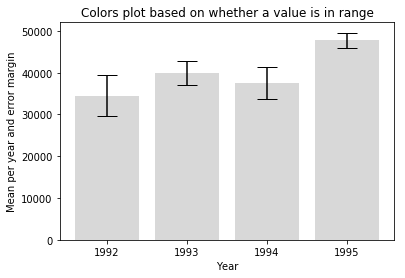

In [38]:
 """test that all classes and methods above are correct"""
def test_plot(data):
    test = ColorPlot(data = data)
    assert test.no_df_cols == 3650
    assert test.no_df_rows == 4
    assert sum(test.mean_per_year) == sum(data.mean(axis = 1))
    assert sum(test.std_per_year) == sum(data.std(axis = 1))
    plot = test.create_default_chart()
    plot.show()
    plot.clf()
    del test
Test = test_plot(df)
del Test

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 20000
lower: 37102.6974972  upper: 42848.6496767  param: 20000
lower: 33662.4168571  upper: 41468.9630424  param: 20000
lower: 46019.7963615  upper: 49577.2123045  param: 20000
Graph displayed below...


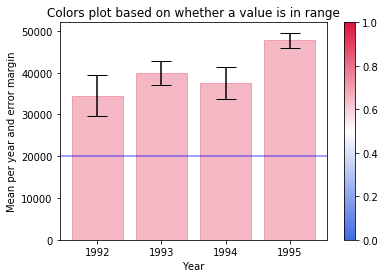

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 25000
lower: 37102.6974972  upper: 42848.6496767  param: 25000
lower: 33662.4168571  upper: 41468.9630424  param: 25000
lower: 46019.7963615  upper: 49577.2123045  param: 25000
Graph displayed below...


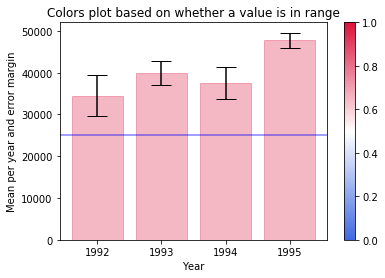

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 30000
lower: 37102.6974972  upper: 42848.6496767  param: 30000
lower: 33662.4168571  upper: 41468.9630424  param: 30000
lower: 46019.7963615  upper: 49577.2123045  param: 30000
Graph displayed below...


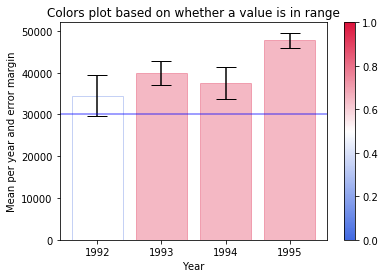

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 35000
lower: 37102.6974972  upper: 42848.6496767  param: 35000
lower: 33662.4168571  upper: 41468.9630424  param: 35000
lower: 46019.7963615  upper: 49577.2123045  param: 35000
Graph displayed below...


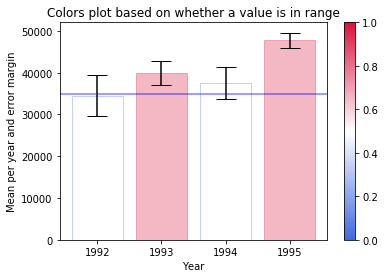

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 40000
lower: 37102.6974972  upper: 42848.6496767  param: 40000
lower: 33662.4168571  upper: 41468.9630424  param: 40000
lower: 46019.7963615  upper: 49577.2123045  param: 40000
Graph displayed below...


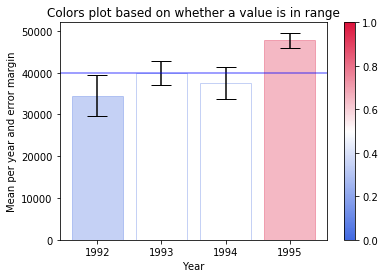

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 45000
lower: 37102.6974972  upper: 42848.6496767  param: 45000
lower: 33662.4168571  upper: 41468.9630424  param: 45000
lower: 46019.7963615  upper: 49577.2123045  param: 45000
Graph displayed below...


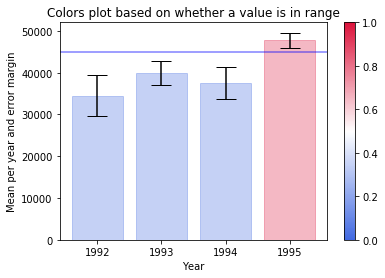

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 50000
lower: 37102.6974972  upper: 42848.6496767  param: 50000
lower: 33662.4168571  upper: 41468.9630424  param: 50000
lower: 46019.7963615  upper: 49577.2123045  param: 50000
Graph displayed below...


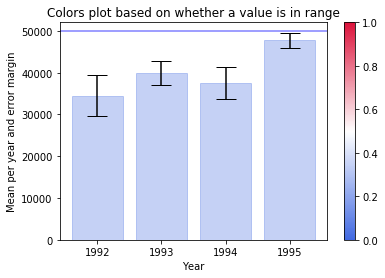

Printing bar values, graph to be displayed below...
lower: 29602.4968311  upper: 39365.6643822  param: 55000
lower: 37102.6974972  upper: 42848.6496767  param: 55000
lower: 33662.4168571  upper: 41468.9630424  param: 55000
lower: 46019.7963615  upper: 49577.2123045  param: 55000
Graph displayed below...


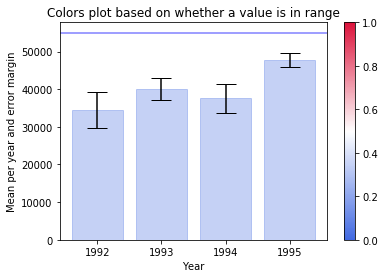

In [39]:
 """loop through various y_parameters to demonstrate the color changes"""
# PLEASE NOTE: change the y_parameter and execute to see changes in graph colors

for i in range(20000, 60000, 5000):
    graph = ColorPlot(data = df)
    plot = graph.create_default_chart()
    graph.y_parameter = i 
    graph.create_color_chart()
    plot.show()
    
plot.clf()
del graph